In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
from PIL import Image
import cv2
import numpy as np
import requests

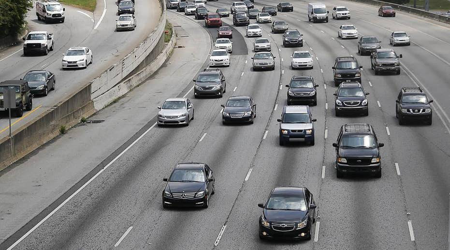

In [10]:
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450, 250))
image_arr = np.array(image)
image

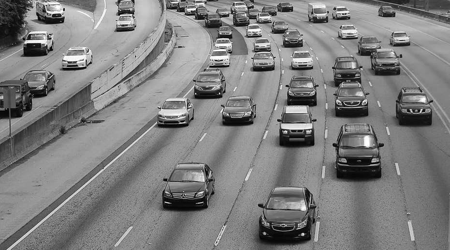

In [12]:
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

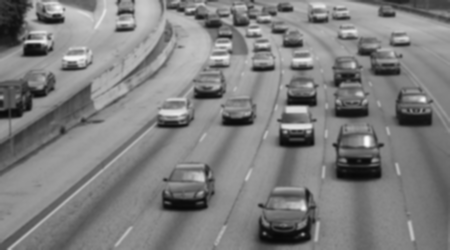

In [15]:
blur = cv2.GaussianBlur(grey,(5, 5), 0)
Image.fromarray(blur)

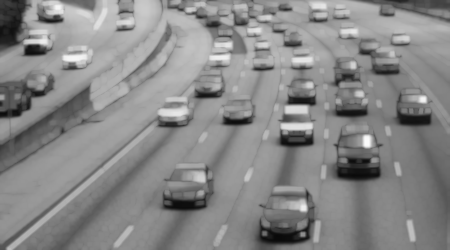

In [16]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

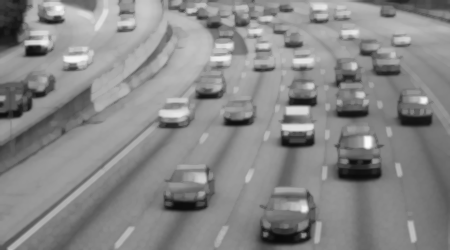

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [21]:
car_cascade_src = '/content/gdrive/MyDrive/Colab Notebooks/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

21  Cars Found!


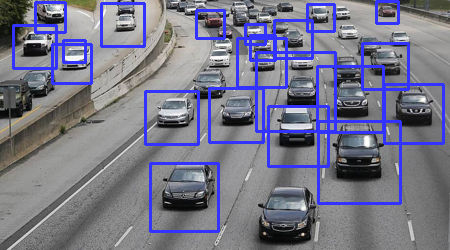

In [23]:
cnt = 0 
for (x, y, w, h) in cars:
    cv2.rectangle(image_arr, (x, y), (x+w, y+h), (51, 51, 255), 2)
    cnt += 1
print(cnt, ' Cars Found!')
Image.fromarray(image_arr)

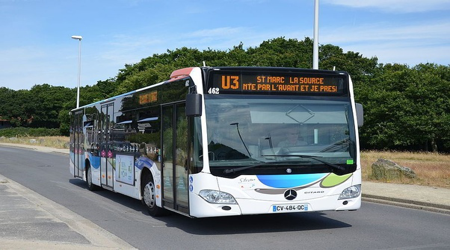

In [28]:
# Reading image form url 
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450, 250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2, cv2.COLOR_BGR2GRAY)
image2

In [29]:
bus_cascade_src = '/content/gdrive/MyDrive/Colab Notebooks/Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1  bus's found


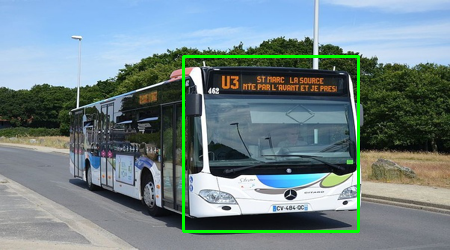

In [34]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(0,255,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

In [35]:
cascade_src = '/content/gdrive/MyDrive/Colab Notebooks/cars.xml'
video_src = '/content/gdrive/MyDrive/Colab Notebooks/Cars.mp4'
cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (450, 250))

In [36]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img) 
video.release()

### Shopi Nurhidayanti 
Garut, 18 Juli 2022 


---
cr by Pianalytix
